In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving training.csv to training.csv


In [ ]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
train_data.drop(['Date'], axis=1)
test_data.drop(['Date'], axis=1)

,RateRatio,CPIRatio,GDPRatio,PMIRatio,UnemployRatio,US-M2,Gold/Euro,US International Trade,NASDAQ,US TREASURY EURODOLLAR SPREAD,Crude Oil Future,Baltic Dry Index,Copper Future,Housing Starts,FTSE EUROTOP 100 index,lagSpot
0,2.483984,-5.554641,-1.067781,-0.268869,-1.403568,-1.154243,1.765820,1.333915,-1.128029,-15.436414,-0.689032,-1.422502,-0.462135,-1.847318,0.443362,1.0899
1,2.483984,-5.554641,-1.067781,-0.268869,-1.403568,-1.154243,1.762641,1.333915,-1.275687,1.771372,-0.770159,-1.407935,-0.500476,-1.847318,0.427762,1.0843
2,2.483984,-5.554641,-1.067781,-0.268869,-1.403568,-1.154243,1.715429,1.333915,-1.337485,1.718310,-0.857527,-1.403773,-0.433379,-1.847318,0.237076,1.0905
3,2.483984,-5.554641,-1.067781,-0.268869,-1.403568,-1.154243,1.799350,1.333915,-1.486361,1.804560,-0.843174,-1.408975,-0.441595,-1.847318,0.065241,1.0847
4,2.483984,-5.554641,-1.067781,-0.268869,-1.403568,-1.154243,1.732194,1.333915,-1.448988,1.743587,-0.867512,-1.352787,-0.462135,-1.847318,-0.002065,1.0845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2.299579,-5.989848,-0.924843,-0.387450,-1.275185,0.104483,0.582732,1.052467,-2.349355,0.588284,-0.446275,-1.291395,-1.287845,-2.502253,-0.860989,1.0642
67,2.299579,-5.989848,-0.924843,-0.387450,-1.275185,0.104483,0.555176,1.052467,-2.364758,0.542072,-0.575455,-1.150924,-1.428886,-2.502253,-0.870272,1.0618
68,2.299579,-5.989848,-0.924843,-0.387450,-1.275185,0.104483,0.749611,1.052467,-2.199522,0.751233,-0.525530,-1.074965,-1.279628,-2.502253,-0.731352,1.0597
69,2.299579,-5.989848,-0.924843,-0.387450,-1.275185,0.104483,0.754429,1.052467,-2.314466,0.751329,-0.662822,-1.207113,-1.302907,-2.502253,-0.927260,1.0607


In [ ]:
x_train, y_train = train_data.drop(['lagSpot','Date','GDPRatio','US TREASURY EURODOLLAR SPREAD','Housing Starts'], axis=1), train_data['lagSpot']
x_test, y_test = test_data.drop(['lagSpot','Date','GDPRatio','US TREASURY EURODOLLAR SPREAD','Housing Starts'], axis=1), test_data['lagSpot']

In [ ]:
x_train

,RateRatio,CPIRatio,PMIRatio,UnemployRatio,US-M2,Gold/Euro,US International Trade,NASDAQ,Crude Oil Future,Baltic Dry Index,Copper Future,FTSE EUROTOP 100 index
0,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.818116,0.540162,-1.432649,-0.297751,-1.688877,-2.287460,-2.188345
1,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.825439,0.540162,-1.607619,0.010532,-1.708647,-2.202561,-2.219957
2,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.844035,0.540162,-1.546728,0.009908,-1.737782,-2.332648,-2.135800
3,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.710974,0.540162,-1.437448,-0.006318,-1.825187,-2.351819,-2.352363
4,1.697311,-1.164369,-0.399288,-1.088719,0.806394,0.656440,1.302863,-1.415433,0.177154,-1.863686,-2.066997,-2.032795
...,...,...,...,...,...,...,...,...,...,...,...,...
398,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.644493,0.540162,-1.483812,0.110380,-1.208153,-1.993053,-2.039207
399,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.717141,0.540162,-1.544808,0.037366,-1.402732,-1.895830,-1.961345
400,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.687079,0.540162,-1.096502,0.066697,-1.560892,-1.773959,-1.620844
401,1.126536,-3.493981,-0.423555,-1.133637,0.490312,0.739591,0.540162,-1.205670,0.004915,-1.605635,-1.895830,-1.914893


In [ ]:
y_train.head()

0    0.9998
1    1.0003
2    0.9906
3    0.9955
4    0.9947
Name: lagSpot, dtype: float64

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
hidden_units4 = 128
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 160)               2080      
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 dense_6 (Dense)             (None, 480)               77280     
                                                                 
 dropout_4 (Dropout)         (None, 480)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               123136    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values,
    y_train.values,
    epochs=10,
    batch_size=7,
    validation_split=0.15
)

Epoch 1/10
49/49 [==============================] - 2s 14ms/step - loss: 0.0768 - mean_squared_logarithmic_error: 0.0766 - val_loss: 0.0494 - val_mean_squared_logarithmic_error: 0.0488
Epoch 2/10
49/49 [==============================] - 0s 8ms/step - loss: 0.0090 - mean_squared_logarithmic_error: 0.0090 - val_loss: 0.0083 - val_mean_squared_logarithmic_error: 0.0083
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0043 - mean_squared_logarithmic_error: 0.0043 - val_loss: 0.0032 - val_mean_squared_logarithmic_error: 0.0031
Epoch 4/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0030 - mean_squared_logarithmic_error: 0.0030 - val_loss: 0.0026 - val_mean_squared_logarithmic_error: 0.0025
Epoch 5/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_logarithmic_error: 0.0019
Epoch 6/10
49/49 [==============================] - 1s 13ms/step - loss: 0.00

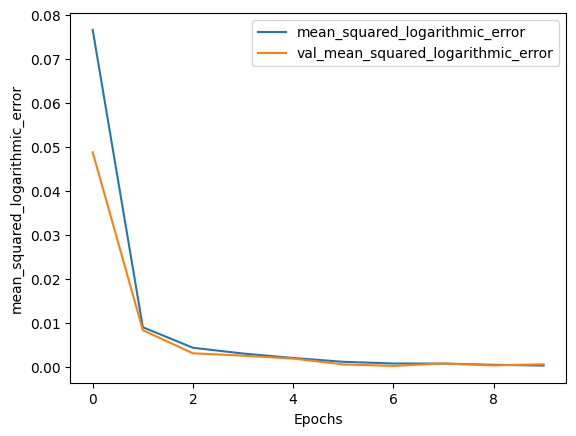

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
x_test['prediction'] = model.predict(x_test)
x_test['actual'] = y_test

3/3 [==============================] - 0s 5ms/step


In [ ]:
x_test

,RateRatio,CPIRatio,PMIRatio,UnemployRatio,US-M2,Gold/Euro,US International Trade,NASDAQ,Crude Oil Future,Baltic Dry Index,Copper Future,FTSE EUROTOP 100 index,prediction,actual
0,2.483984,-5.554641,-0.268869,-1.403568,-1.154243,1.765820,1.333915,-1.128029,-0.689032,-1.422502,-0.462135,0.443362,1.074313,1.0899
1,2.483984,-5.554641,-0.268869,-1.403568,-1.154243,1.762641,1.333915,-1.275687,-0.770159,-1.407935,-0.500476,0.427762,1.073645,1.0843
2,2.483984,-5.554641,-0.268869,-1.403568,-1.154243,1.715429,1.333915,-1.337485,-0.857527,-1.403773,-0.433379,0.237076,1.072201,1.0905
3,2.483984,-5.554641,-0.268869,-1.403568,-1.154243,1.799350,1.333915,-1.486361,-0.843174,-1.408975,-0.441595,0.065241,1.069435,1.0847
4,2.483984,-5.554641,-0.268869,-1.403568,-1.154243,1.732194,1.333915,-1.448988,-0.867512,-1.352787,-0.462135,-0.002065,1.069672,1.0845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2.299579,-5.989848,-0.387450,-1.275185,0.104483,0.582732,1.052467,-2.349355,-0.446275,-1.291395,-1.287845,-0.860989,1.053167,1.0642
67,2.299579,-5.989848,-0.387450,-1.275185,0.104483,0.555176,1.052467,-2.364758,-0.575455,-1.150924,-1.428886,-0.870272,1.054030,1.0618
68,2.299579,-5.989848,-0.387450,-1.275185,0.104483,0.749611,1.052467,-2.199522,-0.525530,-1.074965,-1.279628,-0.731352,1.055194,1.0597
69,2.299579,-5.989848,-0.387450,-1.275185,0.104483,0.754429,1.052467,-2.314466,-0.662822,-1.207113,-1.302907,-0.927260,1.053410,1.0607


In [ ]:
x_test.to_csv('Neural Network result.csv')